### Dependencies

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
import csv
import pandas as pd

# Callibration Process
In order to callibrate the sensor, we need to place objects at varying distances from the sensor in the range 20-150 cm. We can then use the distance and voltage data to create a regression model that can be used to predict distance values from voltages outputted by the sensor. 

### Linear Regression Model

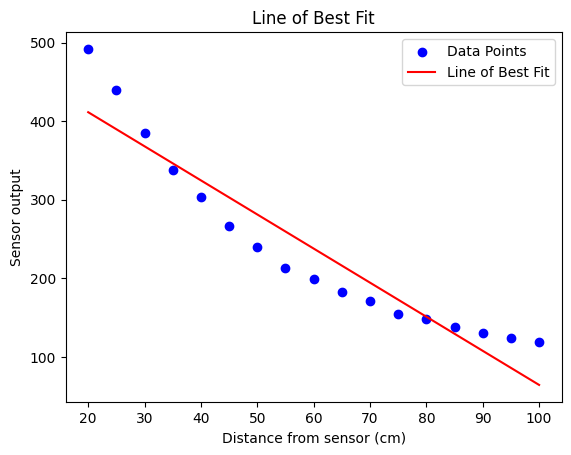

In [42]:
# Inputting data
Distance_train = [20, 25, 30, 40, 45, 50, 60, 65, 70, 80, 85, 90, 95, 100]  # Distances chosen by me to train the model.
Voltage_train = [492, 440, 385, 304, 266, 240, 199, 182, 171, 148, 138, 130, 124, 119]  # The corresponding output voltages.

Distance_test = [35, 55, 75]
Voltage_test = [338, 213, 155]
# Convert lists to numpy arrays
Distance_train = np.array(Distance_train)
Voltage_train = np.array(Voltage_train)

# Calculate the coefficients (slope and intercept)
m, b = np.polyfit(Distance_train, Voltage_train, 1)

# Create a line based on the slope and intercept
line = m * Distance_train + b

# Plot the original data points
plt.scatter(Distance_train, Voltage_train, color='blue', label='Data Points')

# Plot the line of best fit
plt.plot(Distance_train, line, color='red', label='Line of Best Fit')

# Add labels and a legend
plt.xlabel('Distance from sensor (cm)')
plt.ylabel('Sensor output')
plt.title('Line of Best Fit')
plt.legend()

# Show the plot
plt.show()

### Quadratic Regression Model

0.0006438965720350775
-0.5770073568936377
152.65487960122127
[24.63143982 23.43001891 25.94861659 31.18771295 36.75098871 44.73046852
 51.2615565  58.96525616 63.32936373 68.9679707  72.81480124 78.68835443
 81.36170129 85.29023067 88.52577527 91.00652104 93.10922349]
24.129960779965216


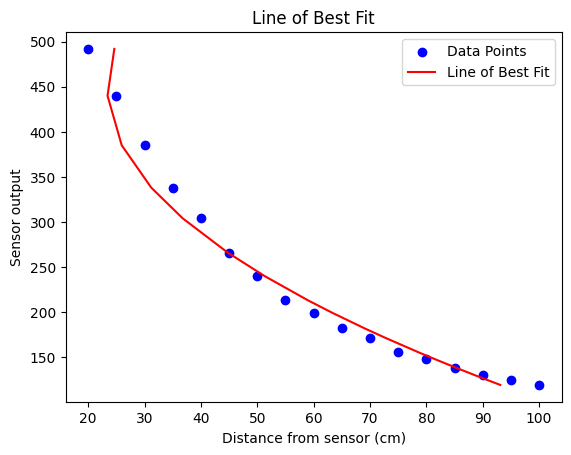

In [64]:
# Inputting data
Distance_train = [20, 25, 30, 40, 45, 50, 60, 65, 70, 80, 85, 90, 95, 100]  # Distances chosen by me to train the model.
Voltage_train = [492, 440, 385, 304, 266, 240, 199, 182, 171, 148, 138, 130, 124, 119]  # The corresponding output voltages.

Distance_test = [35, 55, 75]
Voltage_test = [338, 213, 155]

# Convert lists to numpy arrays
Distance_train = np.array(Distance_train)
Voltage_train = np.array(Voltage_train)

# Calculate the coefficients (slope and intercept)
a, b, c = np.polyfit(Voltage_train, Distance_train, 2)
print(a)
print(b)
print(c)
# Create a line based on the slope and intercept
quadratic = a * Voltage_train * Voltage_train + b * Voltage_train + c
print(quadratic)
print(a * 482 * 482 + b * 482 + c)
# Plot the original data points
plt.scatter(Distance_train, Voltage_train, color='blue', label='Data Points')

# Plot the line of best fit
plt.plot(quadratic, Voltage_train, color='red', label='Line of Best Fit')

# Add labels and a legend
plt.xlabel('Distance from sensor (cm)')
plt.ylabel('Sensor output')
plt.title('Line of Best Fit')
plt.legend()
# Show the plot
plt.show()

Code to create visualizations from data obtained from sensors.

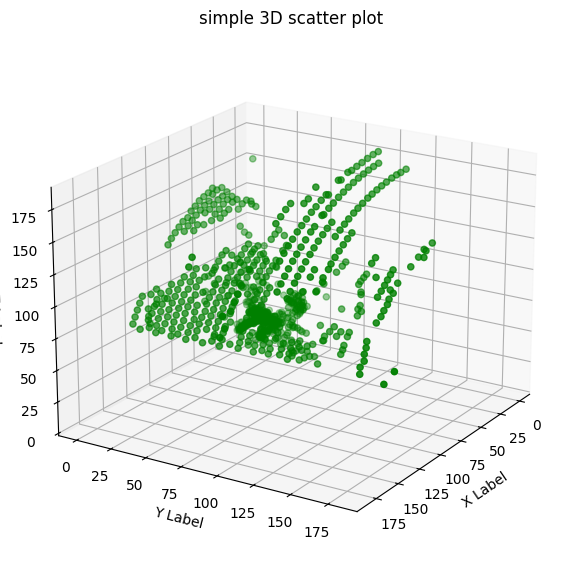

/home/veskew/PIE-Mini-Project-2/.venv/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


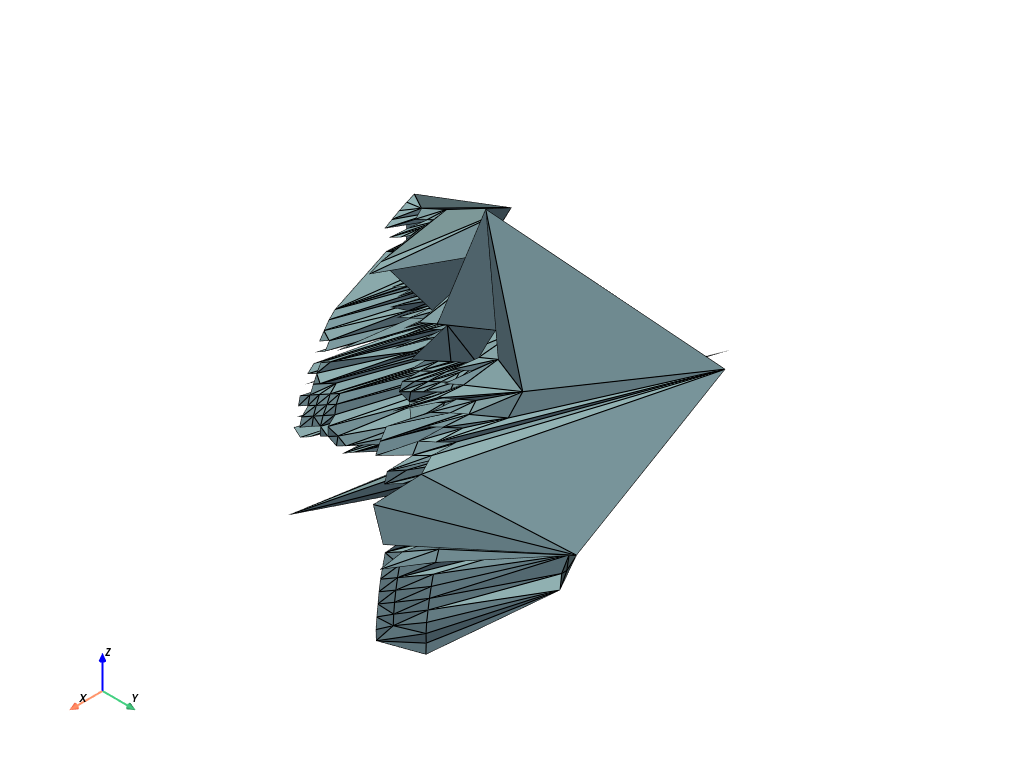

In [81]:


dataSource = 'Scan_1.csv'

with open(dataSource, 'r') as file:
    reader = csv.reader(file)
    next(reader)
    data = list(reader)

data_array = np.array(data, dtype=float)

sensor_output = data_array[:,0]
theta1 = data_array[:,1] # Tilt angle (Servo2)
theta2 = data_array[:,2] # Pan angle (Servo1)

# Mathematical conversions

# Convert angles from degrees to radians
theta1 = (theta1 - 40) * (np.pi/180)
theta2 = (theta2 - 10) * (np.pi/180)

# Convert sensor outputs to distance (cm)
distance = a * sensor_output * sensor_output + b * sensor_output + c

# Convert the coordinates from polar to cartesian
Z_coordinates = np.multiply(distance, np.sin(theta1))
Y_coordinates = np.multiply(np.multiply(distance, np.cos(theta1)), np.sin(theta2))
X_coordinates = np.multiply(np.multiply(distance, np.cos(theta1)), np.cos(theta2))



# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
#ax.set_xlim(-10,10)
#ax.set_ylim(0,20)
#ax.set_zlim(-10,10)
ax.view_init(elev=20., azim=32)

ax.scatter3D(Y_coordinates, Z_coordinates, X_coordinates, color = "green")
plt.title("simple 3D scatter plot")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
# show plot
plt.show()


# Create good 3d plot
pv.Plotter(window_size=[20, 20])
all_coordinates = [X_coordinates, Z_coordinates, Y_coordinates]
data_points = np.transpose(all_coordinates)


# points is a 3D numpy array (n_points, 3) coordinates of a sphere
cloud = pv.PolyData(data_points)

surf = cloud.delaunay_2d()
surf.plot(show_edges=True)

